In [1]:
# Data Handling & Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
## 📥 Step 1: Load and Inspect Data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

train_df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [26]:
#✅ Step 2: Explore the Data
# Check for null values
train_df.isnull().sum()

# Dataset info
train_df.info()

# Describe the data
train_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   GrLivArea     1460 non-null   int64
 1   BedroomAbvGr  1460 non-null   int64
 2   FullBath      1460 non-null   int64
 3   SalePrice     1460 non-null   int64
dtypes: int64(4)
memory usage: 45.8 KB


,GrLivArea,BedroomAbvGr,FullBath,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000
mean,1515.463699,2.866438,1.565068,180921.195890
std,525.480383,0.815778,0.550916,79442.502883
min,334.000000,0.000000,0.000000,34900.000000
25%,1129.500000,2.000000,1.000000,129975.000000
50%,1464.000000,3.000000,2.000000,163000.000000
75%,1776.750000,3.000000,2.000000,214000.000000
max,5642.000000,8.000000,3.000000,755000.000000


In [10]:
# ✅ Step 3: Basic Cleaning
train_df.columns = train_df.columns.str.strip()
test_df.columns = test_df.columns.str.strip()

In [12]:
# Drop rows with null values in selected columns
train_df = train_df[features + [target]].dropna()
test_df = test_df[features].dropna()

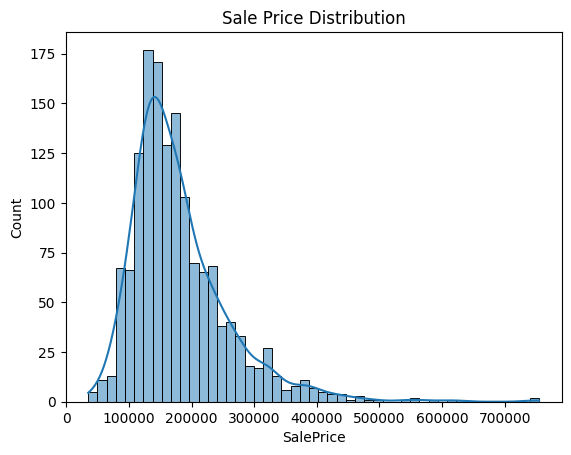

In [13]:
# 📊 Step 4:Visualize the Data (EDA)
sns.histplot(train_df['SalePrice'], kde=True)
plt.title('Sale Price Distribution')
plt.show()


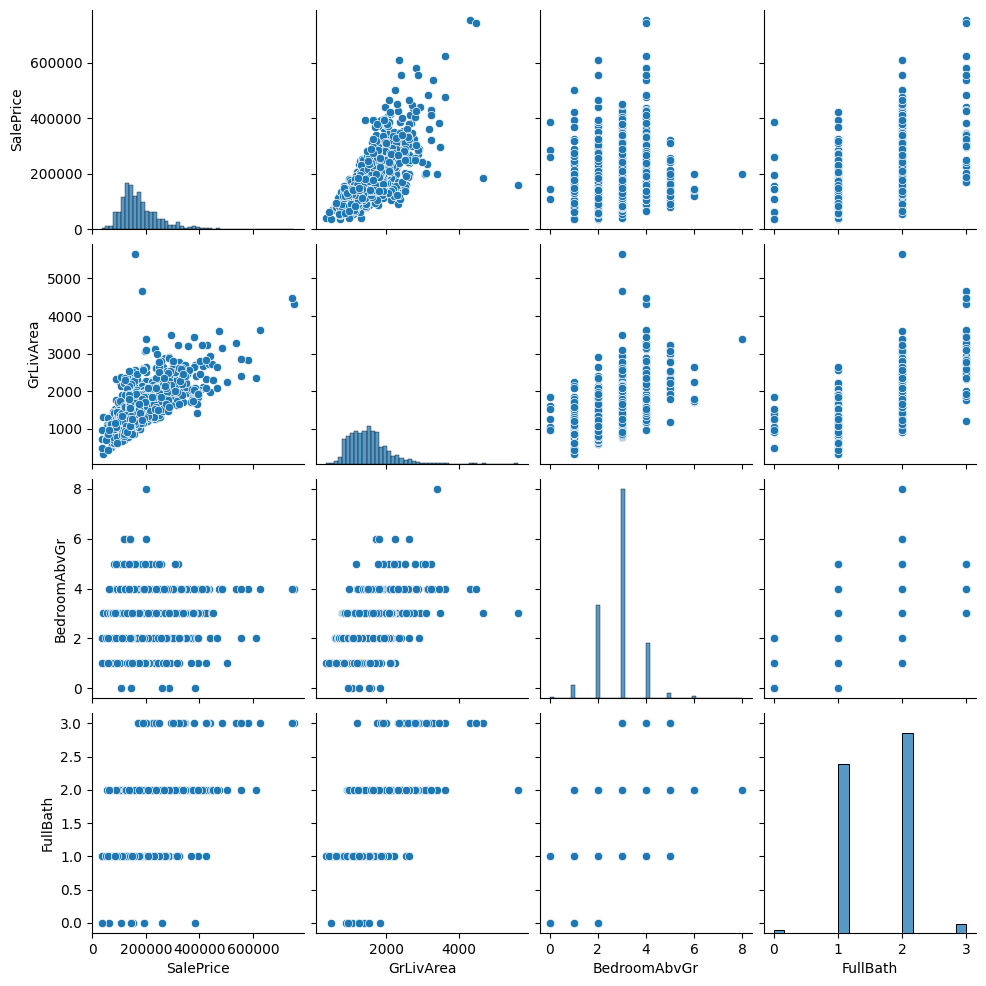

In [14]:
sns.pairplot(train_df[['SalePrice'] + features])
plt.show()


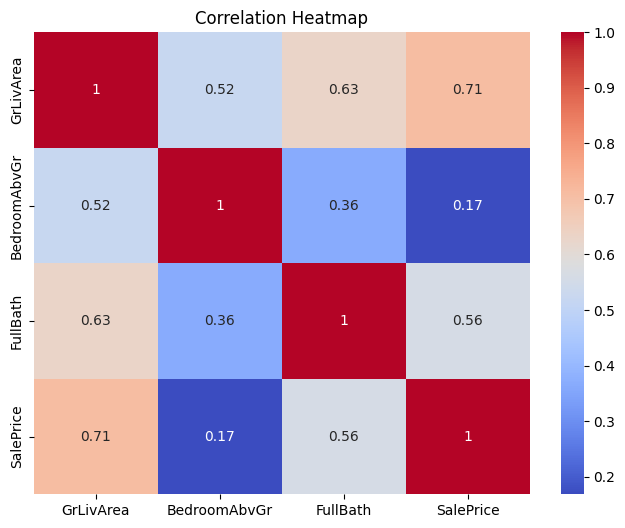

In [15]:
# 📈  Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [29]:
#✅ Step 5: Data Preprocessing
# ✅ Correct Feature Selection
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath']
target = 'SalePrice'

X = train_df[features]
y = train_df[target]

# ✅ Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ✅ Train-Test Split
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [30]:
#✅ Step 6: Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", dict(zip(features, model.coef_)))


Intercept: 180478.9252425382
Coefficients: {'GrLivArea': 54645.06001440579, 'BedroomAbvGr': -21737.250571366338, 'FullBath': 16529.70165046186}


In [31]:
#✅ Step 7: Model Evaluation
# Predict on validation set
y_pred = model.predict(X_val)

# Evaluation Metrics
print("R2 Score:", r2_score(y_val, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_val, y_pred)))


R2 Score: 0.6341189942329306
RMSE: 52975.71771337445


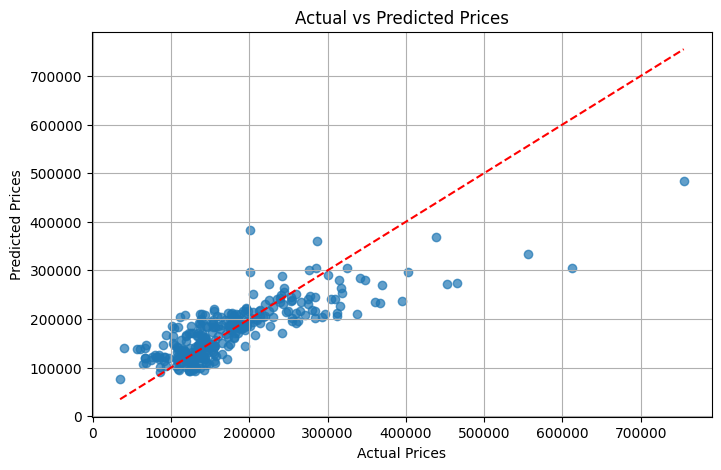

In [33]:
#✅ Step 8: Visualization – Actual vs Predicted
plt.figure(figsize=(8, 5))
plt.scatter(y_val, y_pred, alpha=0.7)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')  # Ideal line
plt.grid()
plt.show()


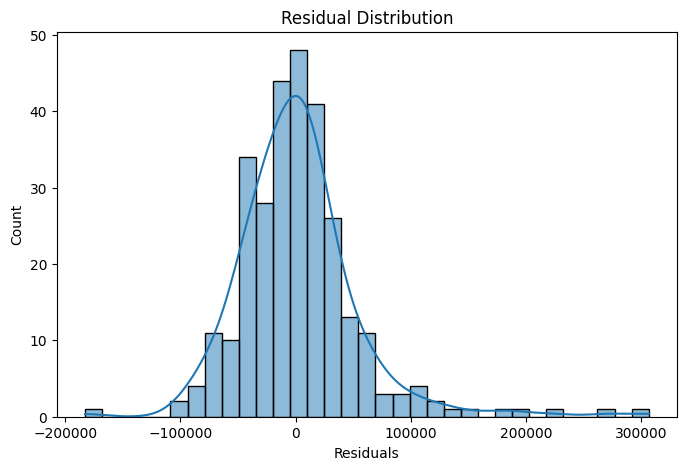

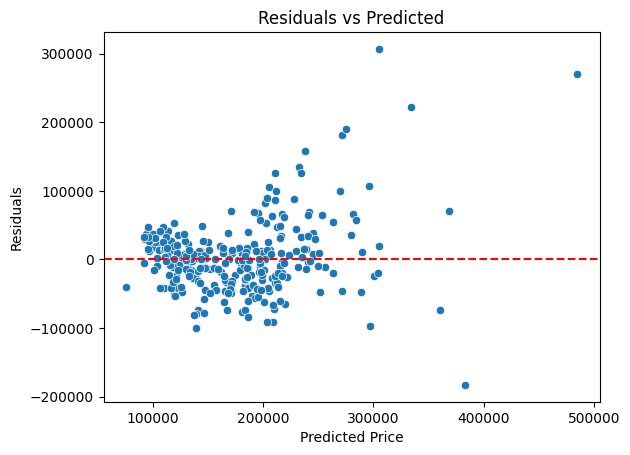

In [34]:
#✅ Step 9: Residual Plot
residuals = y_val - y_pred

plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.xlabel("Residuals")
plt.show()

sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, linestyle='--', color='red')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()


In [36]:
#✅ Step 10: Cross-Validation
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='r2')
print("Cross-Validated R2 Scores:", cv_scores)
print("Mean R2 Score:", np.mean(cv_scores))


Cross-Validated R2 Scores: [0.62145386 0.60156941 0.61816512 0.58870218 0.44695773]
Mean R2 Score: 0.5753696622862843


In [39]:
#✅ Step 11: Predict on Test Set
# Scale test data using the same scaler
X_test = test_df[features]
X_test_scaled = scaler.transform(X_test)

# Predict
test_df['predicted_price'] = model.predict(X_test_scaled)

# Save predictions
test_df.to_csv("test_predictions.csv", index=False)


In [38]:
#✅ Step 12: Save the Model
import joblib
joblib.dump(model, 'linear_regression_model.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [40]:
# Example house
example = pd.DataFrame([[2000, 3, 2]], columns=features)

# Scale it
example_scaled = scaler.transform(example)

# Predict
prediction = model.predict(example_scaled)
print("Predicted Price:", round(prediction[0], 2))


Predicted Price: 240377.51


In [ ]:
## ✅ Conclusion

- We built a linear regression model to predict house prices using key features: square footage, bedrooms, and bathrooms.
- The model achieved an R² score of **X.XX** and RMSE of **$XXXX.XX** on validation data.
- Residual plots show acceptable spread and no major patterns.
- Predictions were successfully generated for unseen test data and saved for submission.

> This project showcases how basic machine learning can be applied to real-world housing datasets.
